<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0QZ9EN1953-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Unveiling the Hidden Gems: A Python-Powered Course Recommendation System Using Clustering and Sentence Transformation Models**


Estimated time needed: **90** minutes


You work for a MOOC (Massive Open Online Courses) you have hundreds of new courses created daily, and all you have is the course description. People would like to select specializations. There is so much course variety you don't even know how many specializations. In addition, you have the equally complex problem of assigning each course to a particular specialization.  

In this guided project, you will use Sentence Transformer models to convert the course description to a vector and cluster similar courses together. You will then determine the optimal number of clusters to determine the number of specializations. Finally, you can assign the specializations to a course based on what cluster it belongs to.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0QZ9EN/images/course%20recommendation.png" alt="clustering courses">


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
    </li>
    <li>
        <a href="#Background">Background</a>  
    </li>
    <li><a href="#Data-Preparation">Data Preparation</a></li>
    <li><a href="#Choosing-the-number-of-clusters-(k)-for-k-means-clustering">Choosing the Number of Clusters</a></li>
    <li><a href="#Clustering-the-Data">Clustering the Data</a></li>
    <li><a href="#Plotting-the-Results">Plotting the Results</a></li>
    <li><a href="#Creating-the-Recommender">Creating the Recommender </a></li>


## 1. Objectives

After completing this project you will be able to:

 - Prepare text for analysis through various stages
 - Vectorize text for ML tasks using state-of-the-art NLP models such as the BERT model for embeddings
 - Determine the optimal number of clusters
 - Use the K-means algorithm for clustering
 - Visualize similar courses in 2D and 3D plots
 - Recommend the cluster of course based in your interest


----


## 2. Setup


### 2.1. Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
!pip install -U 'skillsnetwork' 'yellowbrick' 'sentence-transformers' 'seaborn' 'texthero' 'pyclustering' 'nltk' 'nmslib'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 92.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 77.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 61.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 97.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 80.4 MB/s eta 0:00:00:00:01


In [2]:
import skillsnetwork
await skillsnetwork.download_dataset("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0QZ9EN/data/course-catalog.csv")
await skillsnetwork.download_dataset("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0QZ9EN/data/SN_IBM_course_dataset.csv")

Saved as 'course-catalog.csv'


Saved as 'SN_IBM_course_dataset.csv'


### 2.2. Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [3]:
import nmslib
from nltk.stem import PorterStemmer
import string
import re
import nltk
import skillsnetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

Your CPU supports instructions that this binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib


## 3. Background


Have you ever wondered about identifying similar courses? It could help you to choose alternative courses that offer a better experience for your interests, while still obtaining a similar area of study. Or perhaps selecting a similar course that costs less. This project aims to implement an ML model that can identify similar courses, which can be used as a recommendation system when selecting similar or alternative courses.


## 4. Data Preparation
### 4.1. Course Catalog Dataset
The data includes course catalog data for different courses among different subjects. Our goal is to identify and recommend courses with similar descriptions.

The dataset is created by university of [Illinois](https://discovery.cs.illinois.edu/dataset/course-catalog/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0QZ9EN1953-2022-01-01). The description of each column is given here:




```Year``` : number  The year the course section was offered

```Term ```: string  The term the course section was offered (Fall, Spring, Summer, or Winter)

```YearTerm``` : string ➜ A formatted combination of the year and term

```Subject``` : string ➜ 2-4 letter subject code for the course; ex: HIST for History, CS for Computer Science, etc.

```Number``` : number ➜ 1-3 digit course number

```Description``` : string ➜ Short catalog description for the course

```Credit Hours``` : string ➜ Course credit hours, formatted as a string

```Section Info``` : string | empty ➜ Course section specific information

```Degree Attributes``` : string | empty ➜ Fulfillment of general education credit requirements




Using the Pandas library to read in a CSV file called ```'course-catalog.csv``` and assign it to the variable "data":


In [4]:
df1 = pd.read_csv('course-catalog.csv')
df1.head(2)

Year  Term YearTerm Subject  Number                          Name  \
0  2022  Fall  2022-fa     AAS     100  Intro Asian American Studies   
1  2022  Fall  2022-fa     AAS     100  Intro Asian American Studies   

                                         Description Credit Hours  \
0  Interdisciplinary introduction to the basic co...     3 hours.   
1  Interdisciplinary introduction to the basic co...     3 hours.   

  Section Info                                  Degree Attributes  ...  \
0          NaN  Social & Beh Sci - Soc Sci, and Cultural Studi...  ...   
1          NaN  Social & Beh Sci - Soc Sci, and Cultural Studi...  ...   

  Section Status  Enrollment Status                   Type Type Code  \
0              A               Open  Discussion/Recitation       DIS   
1              A             Closed  Discussion/Recitation       DIS   

  Start Time  End Time Days of Week Room        Building      Instructors  
0   09:00 AM  09:50 AM            F  313  Davenport Hall  Lee, S;Zheng, R  
1   10:00 AM  10:50 AM            F  313  Davenport Hall  Lee, S;Zheng, R  

[2 rows x 27 columns]


We print the column  names of the  dataframe, next, it sorts the data by the column ```Name``` and remove  any duplicate rows in the ```Description``` column, keeping only the first occurrence. Finally, we selects only the columns ```Subject```, ```Name```, and ```Description``` and returns the first five rows of the resulting dataframe using the <code>.head()</code> method.


In [5]:
df1 = pd.read_csv('course-catalog.csv')
print('==> List of all columns: \n\n',list(df1),'\n')

# sort data by names and subset data
df1 = df1.sort_values(by='Name')

# lets drop the duplicated data point in the description
df1 = df1.drop_duplicates(subset='Description', keep="first")

# select columns the we are interested
df1 = df1[['Subject','Name','Description']]
df1.head()

==> List of all columns: 

 ['Year', 'Term', 'YearTerm', 'Subject', 'Number', 'Name', 'Description', 'Credit Hours', 'Section Info', 'Degree Attributes', 'Schedule Information', 'CRN', 'Section', 'Status Code', 'Part of Term', 'Section Title', 'Section Credit Hours', 'Section Status', 'Enrollment Status', 'Type', 'Type Code', 'Start Time', 'End Time', 'Days of Week', 'Room', 'Building', 'Instructors'] 



Subject                              Name  \
5926      GER                    1920s to Today   
6324     HIST  19thC Romanticism &amp; Politics   
11832    SPAN        20th-21stC Spanish Studies   
5934      GER              20thC German Studies   
6309     HIST         20thC World to Midcentury   

                                             Description  
5926   Literary, thematic, cultural, and bibliographi...  
6324   Among the topics of this course will be Romant...  
11832  Examines the cultural production of 20th and 2...  
5934   Seminar in selected genres, themes, or authors...  
6309   Economic, social, political, and cultural deve...

In [6]:
# creating the main dataset
data = df1.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Subject      4412 non-null   object
 1   Name         4412 non-null   object
 2   Description  4411 non-null   object
dtypes: object(3)
memory usage: 103.5+ KB


show then number of unique ```Subject``` in the data


In [7]:
# show the all subject in the data
len(data['Subject'].unique())

190

This project will focus on a dataset containing 190 subjects, some of which have a limited number of data points. In order to ensure a robust analysis, we will select and retain only the 20 most frequent 'Subjects' in the data. We will then investigate how effectively clustering can differentiate these 20 Subject groups based on their descriptions.


We select only subjects that we want to keep (in 'keep' variable).


In [8]:
# counting the datapoints for each group of subject 
keep=data.groupby('Subject').count().sort_values(by='Name',ascending=False)
print(' ==> list of Subject and their counts:', keep)

# keep only first 20 most frequent
keep=keep[:20].index
print('\n ==> List of Subject to keep: \n\n', keep)

 ==> list of Subject and their counts:          Name  Description
Subject                   
MUSC      138          138
MUS       107          107
ECE       100          100
IS         95           95
CS         87           87
...       ...          ...
GMC         1            1
CZCH        1            1
BASQ        1            1
CIC         1            1
HRD         1            1

[190 rows x 2 columns]

 ==> List of Subject to keep: 

 Index(['MUSC', 'MUS', 'ECE', 'IS', 'CS', 'THEA', 'BADM', 'CLE', 'PSYC', 'MATH',
       'FIN', 'ENGL', 'CHEM', 'FSHN', 'CEE', 'CHLH', 'KIN', 'PS', 'RST',
       'ANTH'],
      dtype='object', name='Subject')


In [9]:

data = data[data['Subject'].isin(keep)]
data = data.reset_index(drop=True)
data.shape

(1476, 3)

### 4.2. Preprocessing Text for Clustering


The steps for preprocessing text are as follows:

1. Convert all text to lowercase for consistency and ease of processing.
2. Eliminate any punctuation and stopwords as they do not contribute to the meaning of the text.
3. Use stemming to reduce words to their base form for better grouping of similar words.
4. Apply lemmatization to further normalize the words, treating variations of a word as the same.
5. Transform the processed text into numerical vectors for mathematical analysis and processing.

_In each step, we print the result to see the changes._


In [10]:
# selecting the column that has text
text = data['Description']

# removing null values
text = text[~pd.isnull(text)] #removing missing values

# preprocessing
text=text.tolist()
text[:3]

['Isomorphism theorems for groups. Group actions. Composition series. Jordan-Holder theorem. Solvable and nilpotent groups. Field extensions. Algebraic and transcendental extensions. Algebraic closures. Fundamental theorem of Galois theory, and applications. Modules over commutative rings. Structure of finitely generated modules over a principal ideal domain. Applications to finite Abelian groups and matrix canonical forms. Prerequisite: MATH 417 and MATH 418.',
 'Rigorous proof-oriented course in linear algebra. Topics include determinants, vector spaces over fields, linear transformations, inner product spaces, eigenvectors and eigenvalues, Hermitian matrices, Jordan Normal Form. 3 or 4 undergraduate hours. 3 or 4 graduate hours. Credit is not given for both MATH 416 and either ASRM 406 or MATH 415. 4 hours of credit requires approval of the instructor and department with completion of additional work of substance. Prerequisite: MATH 241 or consent of instructor; MATH 347 is recommen

In [11]:
# make it lower case
text = [t.lower() for t in text]
text[:3]

# Strip all punctuation from each article
# This uses str.translate to map all punctuation to the empty string
table = str.maketrans('', '', string.punctuation)
text = [t.translate(table) for t in text]

# Convert all numbers in the article to the word 'num' using regular expressions
text = [re.sub(r'\d+', 'num', t) for t in text]
# Print the first article as a running example
text[:2]

['isomorphism theorems for groups group actions composition series jordanholder theorem solvable and nilpotent groups field extensions algebraic and transcendental extensions algebraic closures fundamental theorem of galois theory and applications modules over commutative rings structure of finitely generated modules over a principal ideal domain applications to finite abelian groups and matrix canonical forms prerequisite math num and math num',
 'rigorous prooforiented course in linear algebra topics include determinants vector spaces over fields linear transformations inner product spaces eigenvectors and eigenvalues hermitian matrices jordan normal form num or num undergraduate hours num or num graduate hours credit is not given for both math num and either asrm num or math num num hours of credit requires approval of the instructor and department with completion of additional work of substance prerequisite math num or consent of instructor math num is recommended']

**Stemming and Lemmatization** are two text preprocessing techniques used in text mining to reduce words to their base form. Stemming uses heuristics to chop off suffixes of words to arrive at a stem (e.g., accessing, accessed => stem to ==> access), while Lemmatization uses more advanced algorithms to reduce a word to its base form based on its intended meaning. The goal of both Stemming and Lemmatization is to group together different forms of a word so that they can be analyzed as a single item (e.g., was, were, am ==> lemmatize to => be)


In [12]:
# stemming using PorterStemmer
#from nltk.stem import PorterStemmer

# creating stemmer model and fit evey sentence to it
stemmer = PorterStemmer()
text_stem = [stemmer.stem(t) for t in text]

In [13]:
# Import nltk, and WordNetLemmatizer
#import nltk
#from nltk.stem import WordNetLemmatizer

# for lemmatization, you need to download "wordnet" repository which contains family of words
nltk.download("wordnet")

# create lemmatizer and apply it for every sentence in the text
lem = nltk.stem.wordnet.WordNetLemmatizer()
text_lem = [lem.lemmatize(t) for t in text_stem]
text_lem[:3]

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jupyterlab/nltk_data...


['isomorphism theorems for groups group actions composition series jordanholder theorem solvable and nilpotent groups field extensions algebraic and transcendental extensions algebraic closures fundamental theorem of galois theory and applications modules over commutative rings structure of finitely generated modules over a principal ideal domain applications to finite abelian groups and matrix canonical forms prerequisite math num and math num',
 'rigorous prooforiented course in linear algebra topics include determinants vector spaces over fields linear transformations inner product spaces eigenvectors and eigenvalues hermitian matrices jordan normal form num or num undergraduate hours num or num graduate hours credit is not given for both math num and either asrm num or math num num hours of credit requires approval of the instructor and department with completion of additional work of substance prerequisite math num or consent of instructor math num is recommend',
 'lectures and di

It's important to note that applying these preprocessing steps may or may not improve the results depending on the specific task, data and model. So It's a good idea to experiment with different preprocessing steps, and compare the results to find the best approach for your specific problem.


### 4.3. Vectorizing the Sentences


There are several methods for vectorizing sentences for text mining, including:

- **One-hot encoding**: This method represents each sentence as a vector of 0s and 1s, where each dimension of the vector corresponds to a unique word in the vocabulary.

- **Count vectorization**: This method represents each sentence as a vector of word counts, where each dimension of the vector corresponds to a unique word in the vocabulary.

- **TF-IDF**: This method represents each sentence as a vector of term frequency-inverse document frequency values, which takes into account both the frequency of a word in a sentence and the rarity of that word across all sentences.

- **Word embeddings**: This method represents each word in a sentence as a dense vector of real numbers, where each dimension of the vector corresponds to a specific feature of the word.

- **Sentence embeddings**: This method represents each sentence as a dense vector of real numbers, where each dimension of the vector corresponds to a specific feature of the sentence.

- **Doc2vec** : is a method that learns fixed-length feature representations from variable-length pieces of texts, such as sentences, paragraphs or documents.

- **BERT and SBERT**: is a pre-trained transformer-based neural network model that can be fine-tuned for various NLP tasks, such as sentence classification or question answering.

- **Transformer based models** : models like GPT, T5 etc. which are pre-trained on massive amounts of data and can be fine-tuned for various NLP tasks, such as text classification, language translation etc.

------------
Here we use:  
**Sentence-BERT** is a modification of the BERT framework for enabling **large-scale semantic similarity comparison, clustering, and information retrieval.**   
SBERT has a Python library called [sentence_transformers](https://www.sbert.net/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01#:~:text=SentenceTransformers%20is%20a%20Python%20framework,for%20more%20than%20100%20languages) which you can use to compute sentence embeddings for more than 100 languages. These embeddings can then be compared e.g. with cosine-similarity or clustering to find sentences with a similar meaning. This can be useful for semantic textual similar, semantic search, or paraphrase mining.
--------------


You should already have sentence_transformers installed in the **Installing Required Libraries** section. Let's create a list of sentences.


The library offers a large collection of [pre-trained models](https://www.sbert.net/docs/pretrained_models.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX068IEN1371-2022-01-01) for various tasks. For example, the `all-mpnet-base-v2` model provides the best quality, while `all-MiniLM-L6-v2` is 5 times faster and still offers good quality. Let's download the `all-MiniLM-L6-v2` model.


In [14]:
from sentence_transformers import SentenceTransformer
from sentence_transformers import util
model_SBERT = SentenceTransformer('all-MiniLM-L6-v2')

**Use Case of SBERT Embeddings - Course Recommendation**


In this section, we will apply SBERT to our course descriptions.

In general, SentenceTransformer models are based on complex transformer architectures which are known to be large and deep neural networks. Generating embeddings from these models can be computationally expensive and may take longer to run compared to simpler models. This is because embedding generation requires a significant amount of computational resources, such as CPU or GPU power. Therefore, please note that the following cells **may take a few minutes to run**.


In [15]:
# this method encode the sentences into numpy vectors which can be used for clustering task
# the vectorization may take time
embeddings = model_SBERT.encode(text_lem, convert_to_numpy=True,show_progress_bar=True,batch_size=100) # By default, convert_to_numpy = True
embeddings.shape

Batches:   0%|          | 0/15 [00:00<?, ?it/s]

(1476, 384)

In [16]:
#We check that each generated note embedding has length 384.

# quick look to see how it looks like
print(embeddings[0][:50])

[-0.05439125 -0.05611385 -0.0076612   0.02458502 -0.05390879  0.05349707
  0.03884916 -0.05550802  0.0262494  -0.06594925  0.07264095  0.0174734
 -0.02111336 -0.05083277  0.01680724  0.03915072 -0.07581127  0.05780488
 -0.04076366 -0.02741103  0.02231018  0.01286337 -0.04854944  0.04025704
 -0.04496966 -0.04309182 -0.02955399  0.00504693  0.0474054  -0.040225
 -0.08825973  0.05135298  0.07899446  0.01752577 -0.09523842  0.15355127
 -0.01529991  0.03532825 -0.05817359 -0.03264988  0.02318592 -0.00398333
  0.00623468 -0.04402874  0.00563044 -0.02827858  0.03140191 -0.01629698
 -0.04327277  0.01849664]


As you can see, the preprocessing steps have transformed our text into a numerical representation, which is a crucial step in preparing the data for machine learning models such as clustering and classification. This numerical representation allows us to perform mathematical analysis and processing, making the data ready for building and training machine learning models.


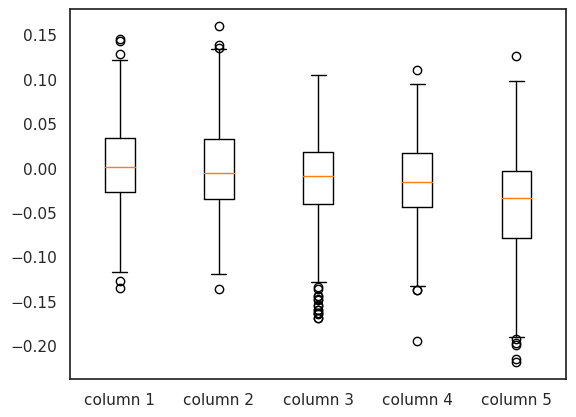

In [17]:
# lets simply plot 5 first columns (out of 384 columns) to visualize the distribution
# Create a figure and axes object
fig, ax = plt.subplots()

# Create the box plots
bp1 = ax.boxplot(embeddings[:,0], positions=[1], widths=0.3)
bp2 = ax.boxplot(embeddings[:,1], positions=[2], widths=0.3)
bp3 = ax.boxplot(embeddings[:,2], positions=[3], widths=0.3)
bp4 = ax.boxplot(embeddings[:,3], positions=[4], widths=0.3)
bp4 = ax.boxplot(embeddings[:,4], positions=[5], widths=0.3)

# Set the x-axis labels
ax.set_xticklabels(['column 1', 'column 2', 'column 3','column 4','column 5'])

# Show the plot
plt.show()

--------
## 5. Choosing the Number of Clusters (k) for K-means Clustering


In clustering, determining the appropriate number of clusters can be a crucial and difficult task. In this project, we will explore various techniques for deciding on the optimal number of clusters.

_Please be aware that running the following cells may take longer due to the intensive computation involved._


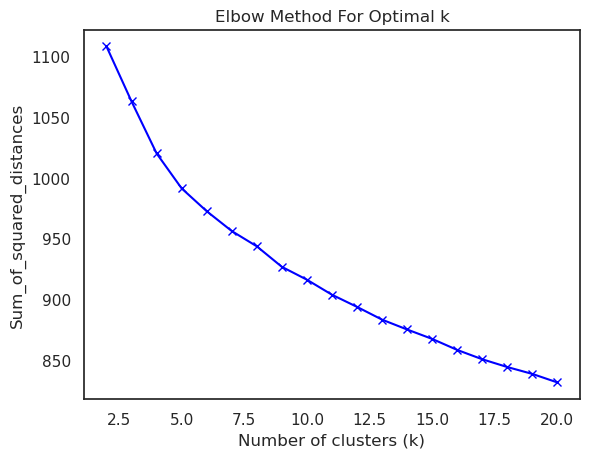

In [18]:
# simple elbow method

Sum_of_squared_distances = []

# range of possible k from 2 to 20
K = range(2,21)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(embeddings)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


The horizontal line indicates the maximum curvature of the line implemented by [Kevin Arvai](https://github.com/arvkevi/kneed). 

The [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0QZ9EN1953-2022-01-01) helps to find the optimal number of clusters by fitting the model with a range of values for K.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


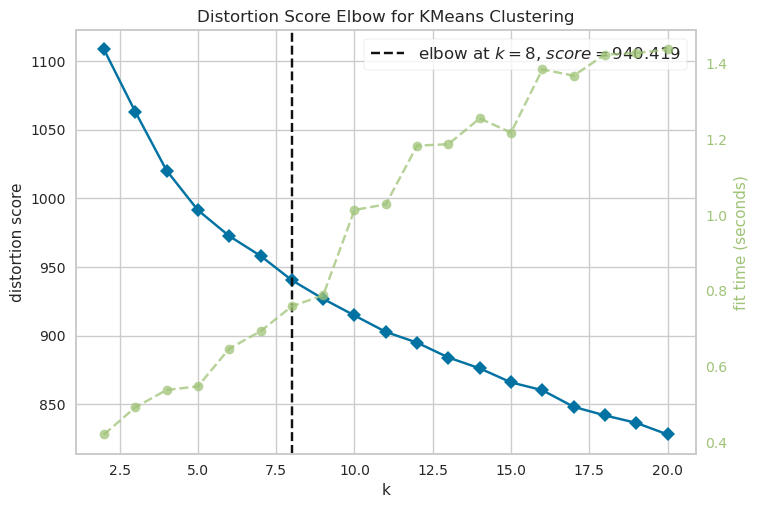

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21), timings= True)
visualizer.fit(embeddings)    
visualizer.show()        

As we can see the suggested k based on elbow method is 8. But, this method may not be best approach to decide the number of clusters.


There are several other methods that can be used to find the optimal number of clusters for k-means clustering in Python, **besides the elbow method**. Some of these methods include:

**Silhouette score**: The silhouette score is calculated by taking the average silhouette of all data points, where the silhouette of an individual data point is defined as the difference between the average distance of that point to all other points in the same cluster and the average distance of that point to all points in the nearest other cluster, divided by the greater of the two.

The **Calinski-Harabasz index**: This method calculates a score for each value of k based on the ratio of the WCSS of the clusters to the between-cluster sum of squares. The optimal number of clusters is the value of k that maximizes the Calinski-Harabasz index.

The **Davies-Bouldin index**: This method calculates a score for each value of k based on the ratio of the WCSS of the clusters to the distance between the centers of the clusters. The optimal number of clusters is the value of k that minimizes the Davies-Bouldin index.

The **X-means algorithm**: This method is an extension of the k-means algorithm that uses a recursive splitting process to automatically determine the optimal number of clusters.


In [20]:
# we going append the best number of k into the list to reach our final desicion
optimal_Ks=[]

### 5.1. Silhouette technique
The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. It can be used to determine the optimal number of clusters for a given dataset.

reference :https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Before running Silhouette technique for the range of clusters (ks), we run the technique on two clusters to show the technique output. 


==> Silhouetter Score: 0.051
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=11))

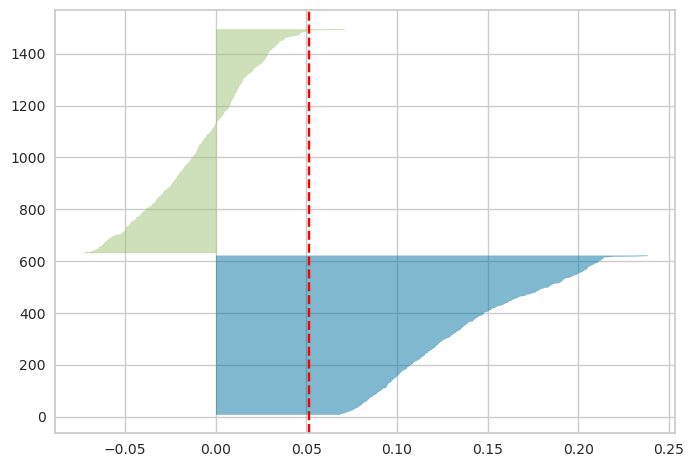

In [21]:
# Trying only two clusters with Silhouette

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the KMeans models
km = KMeans(n_clusters=2, random_state=11)

# Fit the KMeans model
km.fit_predict(embeddings)

# Calculate Silhoutte Score
score = silhouette_score(embeddings, km.labels_, metric='euclidean')

# Print the score
print('==> Silhouetter Score: %.3f' % score)
SilhouetteVisualizer(km, colors='yellowbrick').fit(embeddings)

The dashed line in the plot represents the silhouette average score.

The silhouette score ranges from -1 to 1.

A silhouette score of 1 indicates that the clusters are very dense and well-separated. A score of 0 means that the clusters are overlapping. A score less than 0 suggests that the data points assigned to the clusters may be misclassified


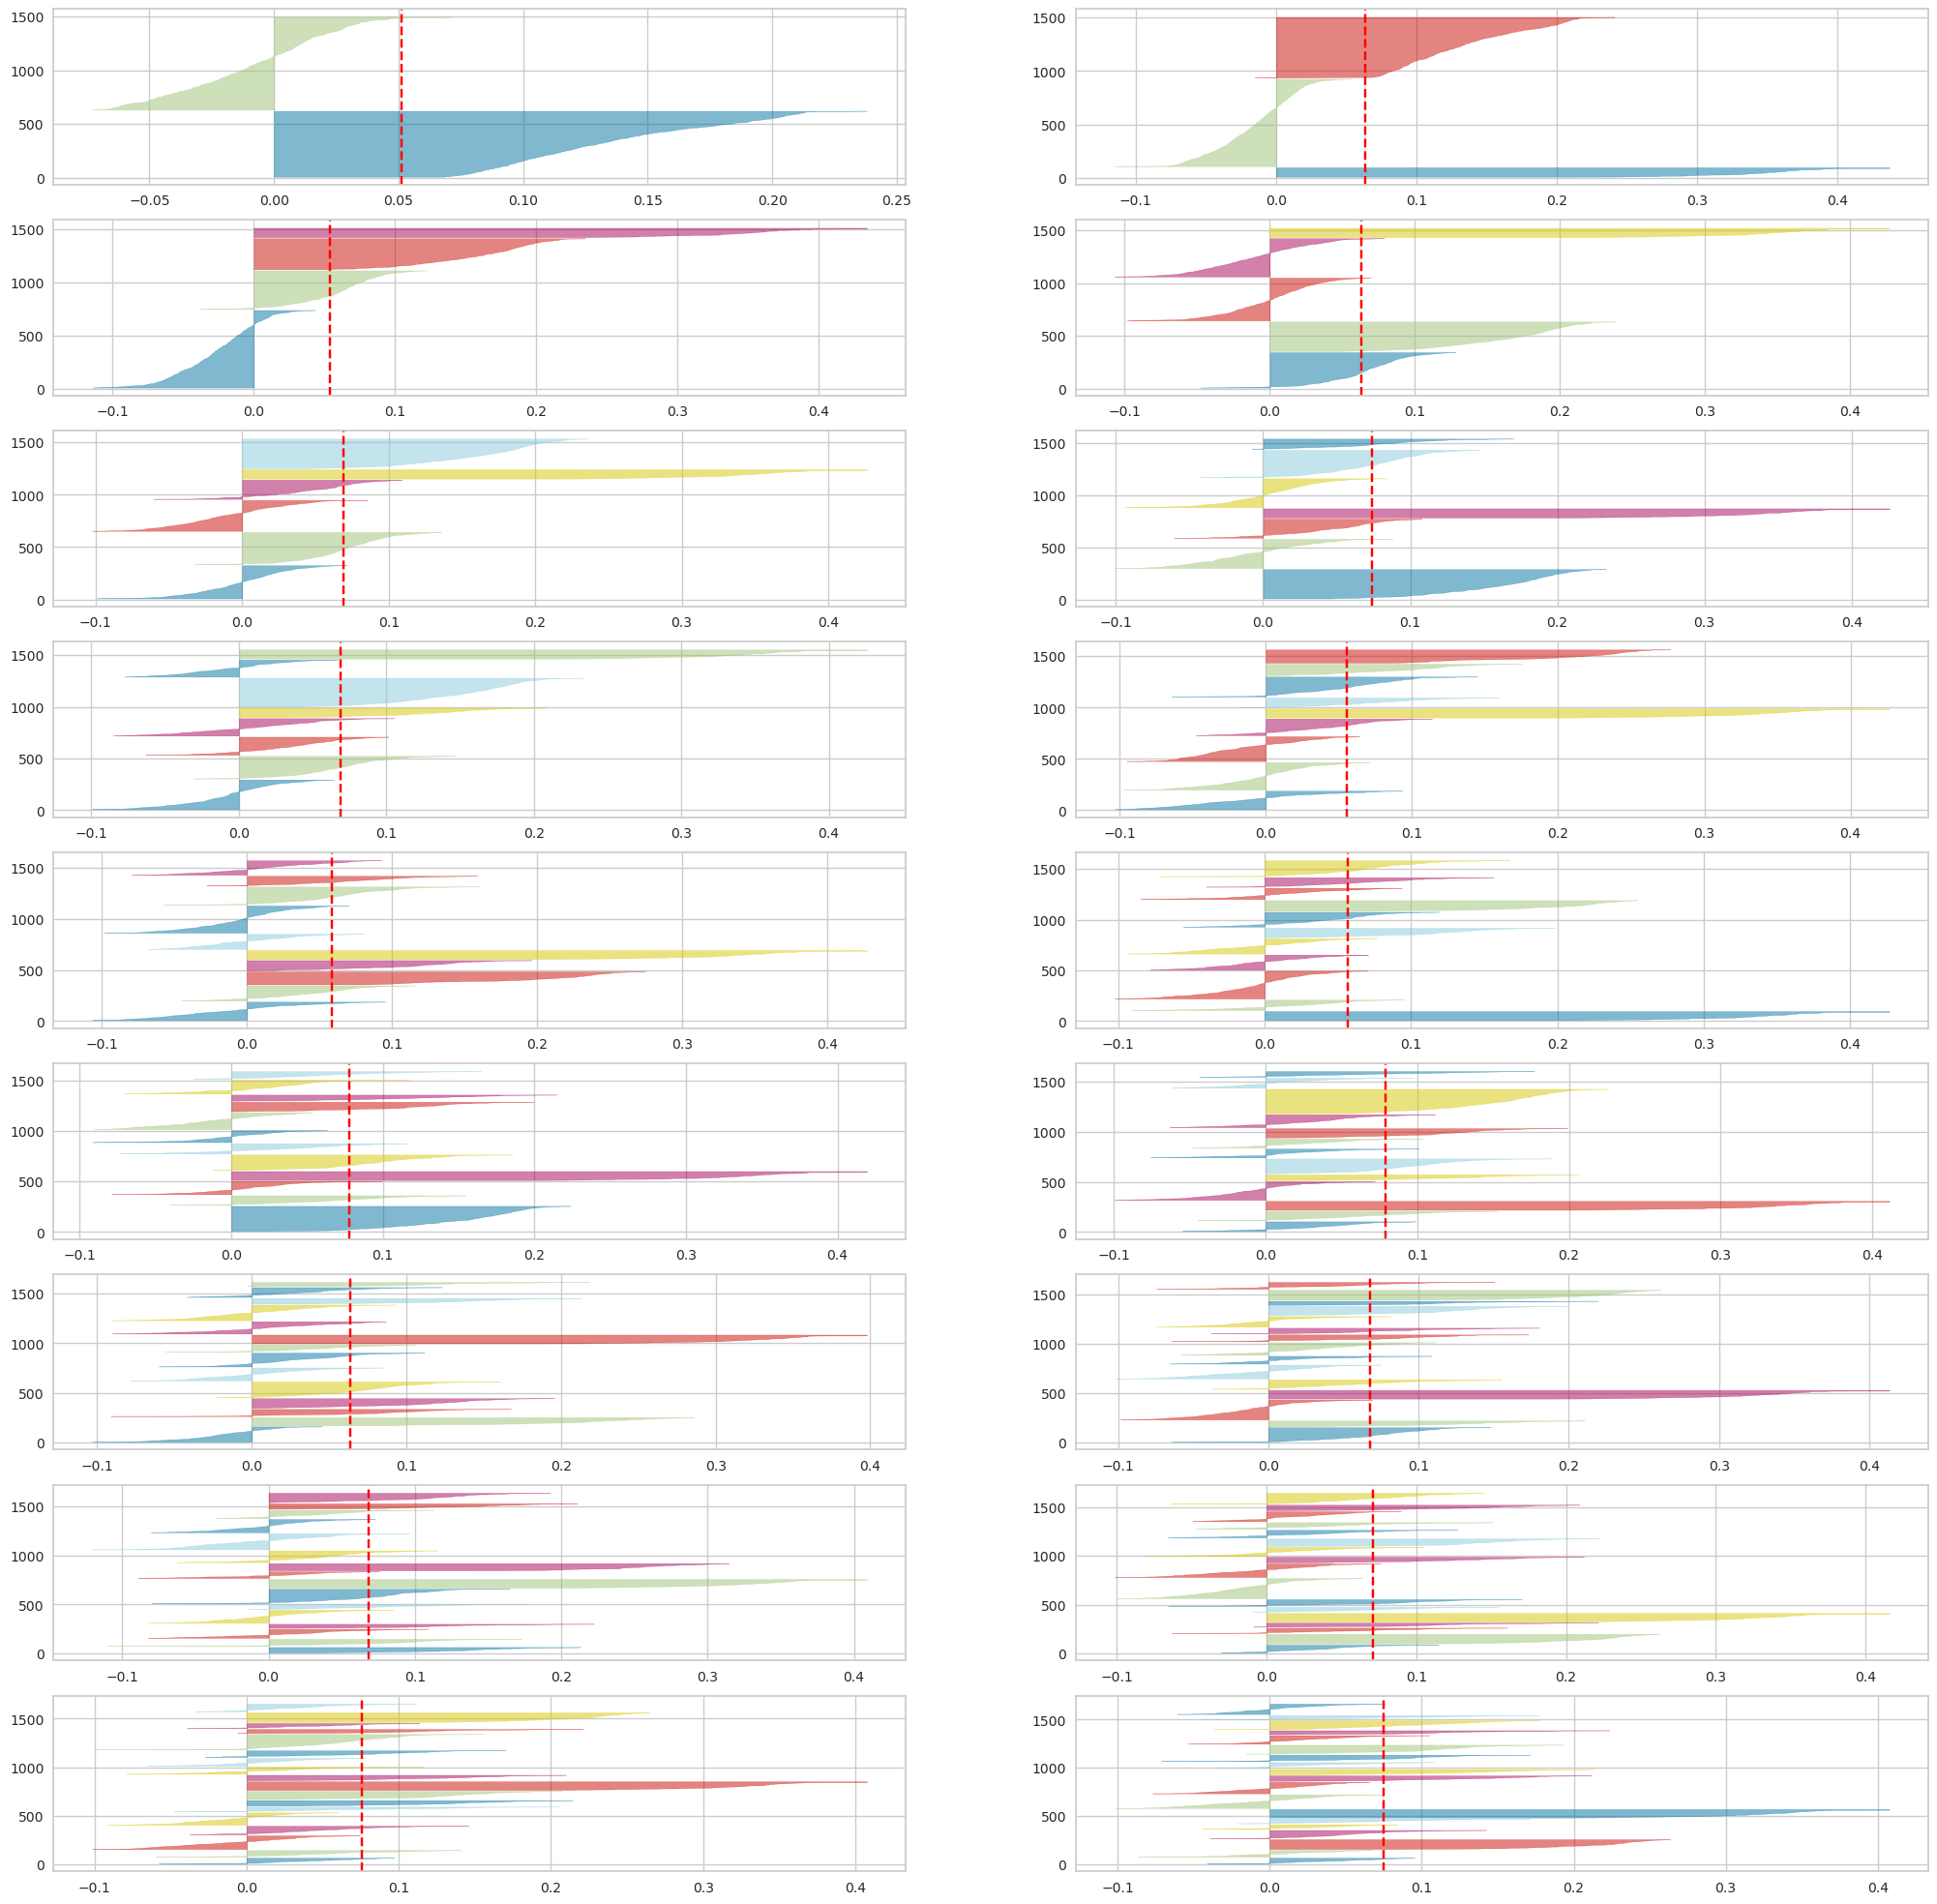

In [22]:
'''
This code loops through the range of number of clusters (2 to 20), 
at each iteration it creates an instance of KMeans algorithm with the number of clusters as i, and then it divides i by 2 and gets the quotient and remainder.
Then it creates an instance of SilhouetteVisualizer with the KMeans instance and set the color to yellowbrick and the ax parameter is set to ax[qou-1][rem].
Finally, it fits the visualizer with the embeddings.
'''
# Create a figure and set of subplots with 10 rows and 2 columns.
fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(25, 25))

# Iterate through the range of number of clusters (2 to 20)
for i in range(2, 20):
    # Create a KMeans instance with the number of clusters as i
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=11)
    # Divide i by 2 and get the quotient and remainder
    quo, rem = divmod(i, 2)

    # Create an instance of SilhouetteVisualizer with the KMeans instance and set the color to yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[quo-1][rem])
    # Fit the visualizer with the embeddings
    visualizer.fit(embeddings)

Our criteria for selecting the best cluster visualization are as follows:

- Presence of more clusters with above-average silhouette scores (as indicated by the dashed line)
- Less fluctuation in the size of the silhouette plots (indicating more uniform clusters)
- Fewer negative points, which represent potential incorrect clustering.

As we can see in the last plot, the amount of noise (negative clusters) increases. Similarly, after k=10, the number of negative scores decreases. Therefore, our optimal cluster would be between 10 < k < 20.

To further assist us in selecting the best value of k, we will utilize the Silhouette score from sklearn to calculate scores for every cluster.


In [23]:
from sklearn.metrics import silhouette_score

# Create a list of possible numbers of clusters to try
num_clusters = list(range(2, 20))

# Calculate the silhouette scores for each number of clusters
silhouette_scores = []
for k in num_clusters:
    # run clustering for each k
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(embeddings)
    labels = kmeans.predict(embeddings)
    #calculating the sihouetter score
    sil_score=silhouette_score(embeddings,labels)
    print("cluster:",k,  "score -> ",  sil_score)
    silhouette_scores.append(sil_score)
    

# displaying the optimum number of clusters
optimal_num_clusters = num_clusters[silhouette_scores.index(max(silhouette_scores))]
print("The highest s-score of the k-clusters: " , optimal_num_clusters)

#appending the result into the opmimum list
optimal_Ks.append(optimal_num_clusters)

cluster: 2 score ->  0.05143722
cluster: 3 score ->  0.05282659
cluster: 4 score ->  0.05358045
cluster: 5 score ->  0.06343711
cluster: 6 score ->  0.069126345
cluster: 7 score ->  0.07355563
cluster: 8 score ->  0.06777884
cluster: 9 score ->  0.069392815
cluster: 10 score ->  0.056939904
cluster: 11 score ->  0.07321264
cluster: 12 score ->  0.07546723
cluster: 13 score ->  0.06399392
cluster: 14 score ->  0.07395815
cluster: 15 score ->  0.067458
cluster: 16 score ->  0.07997671
cluster: 17 score ->  0.06944045
cluster: 18 score ->  0.073898256
cluster: 19 score ->  0.07233042
The highest s-score of the k-clusters:  16


_______________

### 5.2. Davies Bouldin
The Davies [Bouldin index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0QZ9EN1953-2022-01-01) is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.  

The minimum value of the DB Index is 0, whereas a smaller value (closer to 0) represents a better model that produces better clusters.


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Create a list of possible numbers of clusters to try
num_clusters = list(range(2, 21))

# Calculate the silhouette scores for each number of clusters
dav_scores = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embeddings)
    labels = kmeans.predict(embeddings)
    
    # calculating Davies score for each k
    dav_score=davies_bouldin_score(embeddings, labels)
    print("cluster:",k,  "value -> ",  dav_score)
    dav_scores.append(dav_score)
    

# displaying the optimum number of clusters
optimal_num_clusters = num_clusters[dav_scores.index(min(dav_scores))]
print("The optimum score of the k-clusters: " , optimal_num_clusters)

#appending the result into the opmimum list
optimal_Ks.append(optimal_num_clusters)

cluster: 2 value ->  3.8971236838114027
cluster: 3 value ->  2.677461518196459
cluster: 4 value ->  3.2685773258217723
cluster: 5 value ->  3.4789790286116764
cluster: 6 value ->  3.3872632625749035
cluster: 7 value ->  3.267966852265731
cluster: 8 value ->  3.223665402538675
cluster: 9 value ->  3.341205945847871
cluster: 10 value ->  3.1707804728848994
cluster: 11 value ->  3.1409884163273207
cluster: 12 value ->  3.1126526567867683
cluster: 13 value ->  3.2372543522123114
cluster: 14 value ->  3.168669810948768
cluster: 15 value ->  3.1579251396713626
cluster: 16 value ->  3.061615278564517
cluster: 17 value ->  3.023727590870998
cluster: 18 value ->  3.115038655373594
cluster: 19 value ->  3.044772548228473
cluster: 20 value ->  2.9298766061512835
The optimum score of the k-clusters:  3


#### Excercise
Use davies_bouldin_score method from sklearn package to calculate and plot the Davies Boulding score.


<details>
    <summary>Click here for Solution</summary>
    
```python

# Another way for Davies Boulding score 
# plotting Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit_predict(embeddings)
    scores.append(davies_bouldin_score(embeddings, model))
    
plt.plot(list(range(2,21)), scores, marker='o', color='b')
plt.title('Davies Bouldin score for the cluster number (K) (The lower is better)')
plt.xlabel('The cluster number (k)')
plt.ylabel('Davies Bouldin score')
```


______________
### 5.3. Calinski-Harabasz
**The Calinski-Harabasz index**: This method calculates a score for each value of k based on the ratio of the WCSS of the clusters to the between-cluster sum of squares. The optimal number of clusters is the value of k that maximizes the Calinski-Harabasz index.


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Create a list of possible numbers of clusters to try
num_clusters = list(range(2, 21))

# Calculate the silhouette scores for each number of clusters
cal_scores = []
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(embeddings)
    labels = kmeans.predict(embeddings)
    
    # calculating Calinski index
    cal_score=calinski_harabasz_score(embeddings, labels)
    print("cluster:",k,  "value -> ",  cal_score)
    cal_scores.append(cal_score)
    

# displaying the optimum number of clusters
optimal_num_clusters = num_clusters[cal_scores.index(max(cal_scores))]
print("The optimum score of the k-clusters: " , optimal_num_clusters)

cluster: 2 value ->  90.82385040133674
cluster: 3 value ->  78.707669701917
cluster: 4 value ->  75.21794482401383
cluster: 5 value ->  68.71208672659738
cluster: 6 value ->  61.67342409733203
cluster: 7 value ->  56.235686584134264
cluster: 8 value ->  51.97061661648792
cluster: 9 value ->  49.33363508353126
cluster: 10 value ->  46.847153266833985
cluster: 11 value ->  44.13282444936526
cluster: 12 value ->  42.227894246373886
cluster: 13 value ->  40.22255087018268
cluster: 14 value ->  38.53560410030926
cluster: 15 value ->  37.25169145507896
cluster: 16 value ->  36.018122541066035
cluster: 17 value ->  34.716352322021365
cluster: 18 value ->  33.50285178575567
cluster: 19 value ->  32.89737185303702
cluster: 20 value ->  32.06326637884097
The optimum score of the k-clusters:  2


**KElbowVisualizer also provides Calinski index**


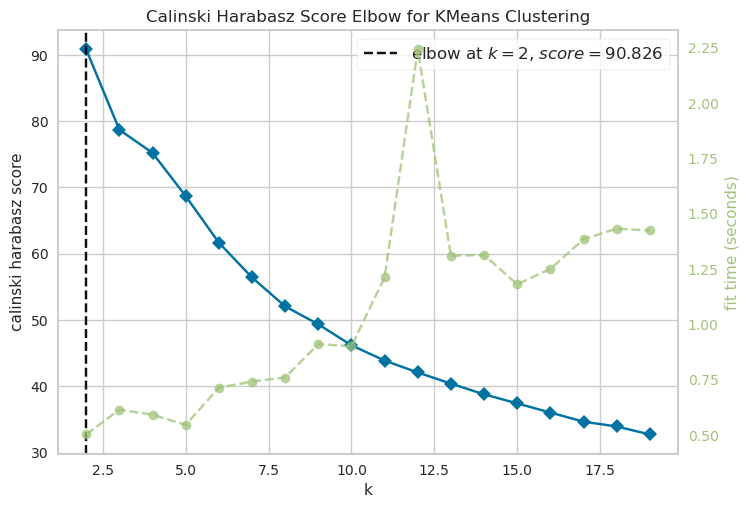

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz')
visualizer.fit(embeddings)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

-----
### 5.4. X-means Algorithm
The **X-means algorithm**: This method is an extension of the k-means algorithm that uses a recursive splitting process to automatically determine the optimal number of clusters.


In [27]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Create an X-means object with the sample data
xmeans_instance = xmeans(embeddings, kmeans_plusplus_initializer(embeddings, 2).initialize())

# Perform the X-means algorithm
xmeans_instance.process()

# Get the optimal number of clusters
clusters = xmeans_instance.get_clusters()

# print the clusters
print('the identified optimum cluster ==> ',len(clusters))

#appending the result into the opmimum list
optimal_Ks.append(len(clusters))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
the identified optimum cluster ==>  8


For voting the optimum number of clustering, we use **median**. Using the median can be better than using the mean when the data set contains outliers or extreme values. 


In [28]:
# lets vote the median of the suggested clusters
int(np.median(optimal_Ks))

8

## 6. Clustering the Data 


In [29]:
#'How many clusters do you want to use? use utilze median to vote

# lets use median of the optimal number of clusters
true_k = int(np.median(optimal_Ks))
k_model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
k_model.fit(embeddings)

# the labels given by clusters
labels=k_model.labels_
labels

array([7, 4, 4, ..., 4, 1, 6], dtype=int32)

In [30]:
data.shape

(1476, 3)

In [31]:
# adding the labels to the our original dataset
data['labels'] = pd.Categorical(labels)

data.head()

Subject                                      Name  \
0    MATH                        Abstract Algebra I   
1    MATH                   Abstract Linear Algebra   
2    CHEM                   Accelerated Chemistry I   
3    CHEM               Accelerated Chemistry Lab I   
4      CS  Accelerated Fundamentals of Algorithms I   

                                         Description labels  
0  Isomorphism theorems for groups. Group actions...      7  
1  Rigorous proof-oriented course in linear algeb...      4  
2  Lectures and discussions. Beginning chemistry ...      4  
3  Companion laboratory course to CHEM 202. Compr...      4  
4  The first class in a sequence of two classes t...      7

Let's see how are 'labels' are given with respect 'Subject'. For doing this, we create a table that includes cross counts of the groups of 'Subject' and 'label'.


In [32]:
# data.groupby(['labels','Subject']).size(): this groups the data by two columns 'labels' and 'Subject' and then it counts the number of occurances in each group.
# .unstack() : this unstacks the DataFrame, which means it pivots the dataframe from long format to wide format.
data_wide = data.groupby(['labels','Subject']).size().to_frame().unstack()
data_wide

0                                                                 \
Subject ANTH BADM CEE CHEM CHLH CLE  CS ECE ENGL FIN FSHN  IS KIN MATH  MUS   
labels                                                                        
0         29    0   0    0    1   0   1   0   37   0    0  19   2    0    1   
1          7    1   0    1   29   0   1   1    0   0   28  10  40    0    0   
2          0    0   0    0    0   0   0   1    0   0    0   0   0    0  103   
3          5    2   1    4    7   0  11  14    9   0    4   1   4    6    0   
4         11    8   5   39    6   0   8  14   16   8   14  30   4   18    1   
5          0    0   0    0    8  75   0   0    0   0    1   0   5    0    0   
6          0   61   0    0    4   0   2   1    0  54    6  15   1    0    0   
7          0    5  50   14    1   0  64  69    0   4    4  20   0   49    2   

                                
Subject MUSC  PS PSYC RST THEA  
labels                          
0          0  42    5   7    9  
1          0   3   40  15   21  
2        138   0    0   0   33  
3          0   4   10   5    2  
4          0   5   14   7   12  
5          0   0    4   0    0  
6          0   1    1  18    1  
7          0   0    0   0    2

Each row of the database corresponds to a cluster and each column of the subject. Most of the columns are zero for each cluster except for a few. Thus the clustering algorithm takes samples that belong to a specific topic 
Let us visualize the results to gain more insight. 


## 7. Plotting the Results


Our vectorized data has high dimensions (384 columns), and to plot it, we need to reduce the dimensions.


In [33]:
embeddings.shape

(1476, 384)

t-SNE is a dimensionality reduction technique that reduces high-dimensional data to a 2D or 3D space, making it easier to visualize patterns or clusters. It preserves local relationships between data points and separates different clusters. It is commonly used with clustering and can be sensitive to initial conditions and parameters. It is useful for visualizing high-dimensional datasets and is often used with clustering to interpret results.

Our dataset with 1205 data points, each represented by a set of 384 features, it would be difficult to visualize all of these features at once and understand the relationships between the data points. t-SNE can be used to project the data points into a 2D or 3D space, where you can see clusters of similar data points and understand their relationships.
  
We transform the data points two a 2D space:


### 7.1. Plotting 3D 


In [34]:
#reduce the dimension of data into two and then plot it
from sklearn.manifold import TSNE
X_embedded_2d = TSNE(n_components=2).fit_transform(embeddings)

In [35]:
data

Subject                                               Name  \
0       MATH                                 Abstract Algebra I   
1       MATH                            Abstract Linear Algebra   
2       CHEM                            Accelerated Chemistry I   
3       CHEM                        Accelerated Chemistry Lab I   
4         CS           Accelerated Fundamentals of Algorithms I   
...      ...                                                ...   
1471    ENGL                                    Writing Studies   
1472    ENGL                               Writing Technologies   
1473    ENGL        Writing about Literature, Text, and Culture   
1474      IS                       Youth Services Librarianship   
1475    BADM  iVenture Accelerator Seminar I: Topics in Entr...   

                                            Description labels  
0     Isomorphism theorems for groups. Group actions...      7  
1     Rigorous proof-oriented course in linear algeb...      4  
2     Lectures and discussions. Beginning chemistry ...      4  
3     Companion laboratory course to CHEM 202. Compr...      4  
4     The first class in a sequence of two classes t...      7  
...                                                 ...    ...  
1471  Reviews theory and research on the social and ...      0  
1472  Examines the relationship of computer technolo...      0  
1473  Writing-intensive, variable-topic course desig...      4  
1474  Theory and techniques in planning, implementin...      1  
1475  Designed for students actively engaged in lear...      6  

[1476 rows x 4 columns]

We overlay the cluster as a color:


Also, We can use `texthero` library for dimensionality reduction and interactive plotting.


In [36]:
import texthero as hero

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz#egg=en_core_web_sm==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 80.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for en_core_web_sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047087 sha256=6d5a1e7779a821a03b777f48535d5ff441138d97c0e0648bd124050d2c4f4e1f
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en_core_web_sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


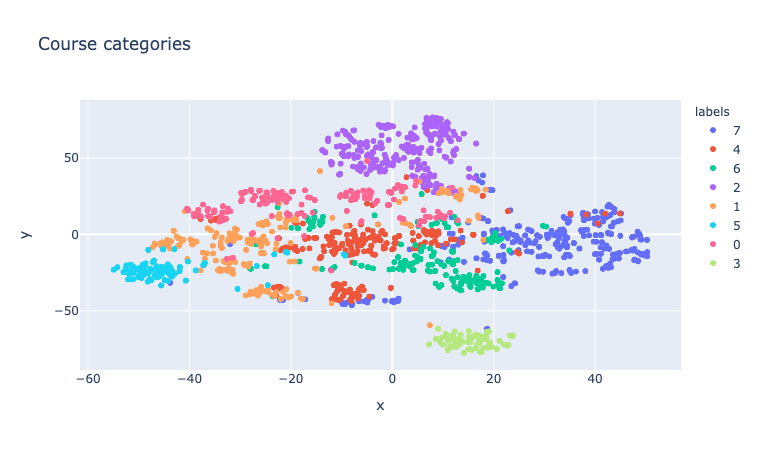

In [37]:
# coverting the vectors to array
data_hero = data.copy()
data_hero['vectors'] = np.array(embeddings).tolist() 

# using TSNE method to reduce the dimensions
data_hero['tsnemodel'] = hero.tsne(data_hero['vectors'])

# plot the data
hero.scatterplot(data_hero, col='tsnemodel'
                 , color='labels'
                 , title="Course categories"
                 , hover_data = ['Subject','Name'])

#### Exercise: Create 2d plot with `sns` library.  


<details>
    <summary>Click here for Solution</summary>

```python
# Using sns package to plot the data
df_2d = pd.DataFrame()
df_2d["y"] = labels
df_2d["comp-1"] = X_embedded_2d[:,0]
df_2d["comp-2"] = X_embedded_2d[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df_2d.y.tolist(),
                palette=sns.color_palette("hls", true_k),
                data=df_2d).set(title="Course data T-SNE projection")
```


### 7.2. Plotting 3D 


In [38]:
# reduce the dimention to 3 for 3d plotting
X_embedded_3d = TSNE(n_components=3).fit_transform(embeddings)

**Interactive 3d Plot With Plotly**


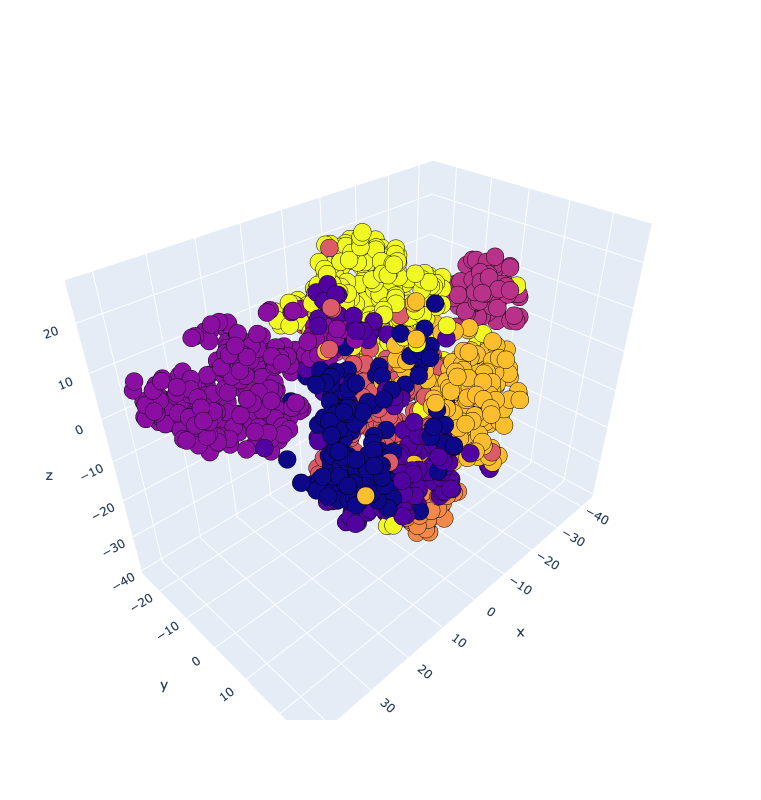

In [39]:
import plotly.graph_objects as go  #for 3D plot
txt=[["Subject: " + data['Subject'][i], "Lables: " + str(data['labels'][i])] for i in range(len(data))]  

trace = go.Scatter3d(x=X_embedded_3d[:,0], y=X_embedded_3d[:,1], z=X_embedded_3d[:,2], 
                     mode='markers',
                     text=txt,
                     marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
trace = [trace]
fig = go.Figure(data = trace, layout = layout)
fig.show()

#### Exercise: Create 3D plot usign `sns` library.


<details>
    <summary>Click here for Solution</summary>

```python
# plotting simple 3D plot

from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8,8

#prepare a dataset for plotting
df_3d = pd.DataFrame()
df_3d["y"] = labels
df_3d["comp1"] = X_embedded_3d[:,0]
df_3d["comp2"] = X_embedded_3d[:,1]
df_3d["comp3"] = X_embedded_3d[:,2]


fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# loop through labels of the clusters
for l in df_3d.y.unique():
    ax.scatter(df_3d.comp1[df_3d.y==l],df_3d.comp2[df_3d.y==l],df_3d.comp3[df_3d.y==l],label=l)
    
ax.legend()
plt.show()
```

</details>


## 8. Creating the Recommender 


### 8.1 Creating a Search Index for the Recommendation


When we perform our search based on the description of courses, we need to be able to find the closest vectors to our search vector. We start by creating an index for the data points. For this, we can use the lightweight and efficient Non-Metric Space Library (NMSLIB). There 3 steps associated with this process:


#### 8.1.1 Initialize a New index Passing 'hnsw' as the Method and 'cosinesimil' as the Space.


In [40]:
import nmslib
model_index = nmslib.init(method='hnsw', space='cosinesimil')

#### 8.1.2. Add the Embeddings to the Index Using `addDataPointBatch()` Method.


In [41]:
model_index.addDataPointBatch(embeddings)

1476

#### 8.1.3. Create the Index With the Data Points Using `createIndex method()`. 

Postprocessing is set to 2 means the maximum level of postprocessing. 


In [42]:
model_index.createIndex({'post': 2})

### 8.2. Creating a Search Function for Recommendation
Finally, we create a search function to find the best bottle of course based on the similarity index between the reviews. The function takes two inputs: DataFrame and UserQuery. The user query will be transformed into a vector using `model.encode()`, just like we did for the course descriptions. Then the *NMSLIB* library can be used to return the k-nearest neighbors (the algorithm classifies the user input based on a similarity measure) of the user’s query vector. We can set the k (number of neighbors) to 20.


In [43]:
def find_best_course(data, q_input):
    # Check if both inputs are not None
    if data is not None and q_input is not None:
        subset = data.copy()
        # Encode the q_input using the SBERT model
        query = model_SBERT.encode([q_input], convert_to_tensor=True)
        # Use the knnQuery function to find the 20 nearest neighbors to the encoded query
        ids, distances = model_index.knnQuery(query, k=20)
        
    # Initialize an empty list to store the best fits
    best_fits = []
    # Iterate through the returned ids and distances
    for i, j in zip(ids, distances):
        # Create a dictionary for each best fit containing information from the original data
        # Subject, Name, Description, cluster and distance returned by the knnQuery function
        best_fits.append({'Subject':subset.Subject.values[i]
                        , 'Name' : subset.Name.values[i]
                        , 'Description': subset.Description.values[i]
                        , 'Cluster': subset.labels.values[i]
                        , 'Distance': j
                       })
    return pd.DataFrame(best_fits)

### 8.3. Getting the Recommendations


 We test our function by adding the description __"exploring and writing about computer technologies"__ and finding the course that are the most similar cluster. 


In [44]:
most_similar=find_best_course(data, "exploring computer and technology cultures")

# exteract the most similar cluster
most_similar[most_similar['Cluster']==int(most_similar['Cluster'].mode())]

Subject                                            Name  \
0       IS                           Computers and Culture   
1       IS        Race, Gender, and Information Technology   
3       IS                        Social Aspects Info Tech   
5       IS                        Reading and Writing Data   
6       IS  History and Foundations of Information Science   
10    ENGL                            Writing Technologies   
14      IS                      Topics in Info Foundations   
15      IS              Social History of Games and Gaming   

                                          Description  Cluster  Distance  
0   This course explores cultural ideas about comp...        0  0.298154  
1   In this course we will critically examine the ...        0  0.443516  
3   Explores the way in which information technolo...        0  0.489111  
5   Explores how we tell stories and make argument...        0  0.505129  
6   Provides an introduction to the historical fou...        0  0.506650  
10  Examines the relationship of computer technolo...        0  0.523263  
14  Directed and supervised investigation of selec...        0  0.551734  
15  A survey of the history of gaming from the anc...        0  0.556902

## Exercise 1: 
load the data 'SN_IBM_course_dataset.csv'  and rename the column ```topic``` to ```Subject``` and ```name``` to  ```Name```


In [45]:
df2 = pd.read_csv('SN_IBM_course_dataset.csv')

# combining the two description columns
df2["Description"] = df2["short_description"] + ' ' + df2["long_description"]
df2 = df2[["topic","name","Description"]]

# rename the column for consitency
df2.rename(columns={"topic": "Subject","name":"Name"}, inplace=True)
df2.head(10)

Subject                                               Name  \
0                    Linux                                      Linux for All   
1           Text Analytics  Classify recipe text to cuisine using NLP and ...   
2  Artificial Intelligence  Marketing. Data Preparation, Basic Statistical...   
3         Machine Learning  Robots are coming! Build IoT apps with Watson,...   
4            Deep Learning  Build an Image Style Transfer Tool using Cycle...   
5                 Big Data                                 MapReduce and YARN   
6               Containers  Deploy a Computer Vision App in a Serverless E...   
7             Open Liberty  Streaming updates from a MicroProfile Reactive...   
8             Data Science  Credit Card Fraud Detection using Scikit-Learn...   
9              Open Source   Build Machine Learning Applications Using Gradio   

                                         Description  
0  Linux for All this course enables the new user...  
1  Have you ever wondered why certain foods taste...  
2  This lab is dedicated to loading, pre-preparat...  
3  Learn how to program a simple robot (TJBot) to...  
4  In this guided project, we will teach you to b...  
5  String together your understanding of Yet Anot...  
6  Learn how to make your object detection applic...  
7  Learn how to stream updates from a MicroProfil...  
8  Snap ML is a high-performance IBM library for ...  
9  Are you a Machine Learning practitioner who ha...

<details>
    <summary>Click here for Solution</summary>

```python
# data preparation
df2 = pd.read_csv('SN_IBM_course_dataset.csv')

# combining the two description columns
df2["Description"] = df2["short_description"] + ' ' + df2["long_description"]
df2 = df2[["topic","name","Description"]]

# rename the column for consitency
df2.rename(columns={"topic": "Subject","name":"Name"}, inplace=True)
df2.head(2)

# follow from 4.2
```
    


In [ ]:
# write your code here

 ## Exercise 2: 
    
Assign the  ```Description``` column of the ```df2``` DataFrame, which was created in the previous code snippet, and assign it  ```text```. 
Removing any null/missing values in ```text``` converts the series into a list using and display the first 3 elements.


In [46]:
text = df2['Description']

# removing null values
text = text[~pd.isnull(text)] #removing missing values

# preprocessing
text=text.tolist()
text[:3]

['Linux for All this course enables the new users to start with shall commands to play with world most popular OS. About this CourseThis course is the starter kit for newcomers keen to learn the Linux\xa0 \xa0 .Course SyllabusAfter completing this course you will be able to understands the basic Linux commands:Intro to Linux CommandsWhat is LinuxList of Linux distrosUseful Linux CommandsBasic System commandsManaging filesCreate users and groupGeneral InformationThis is your place to add any additional information about your course. Feel free to mention the assessment style, a recommended timeline of events, or any other important information that a learner should know.Recommended Skills Prior to Taking this CourseBasic computer knowledge.',
 "Have you ever wondered why certain foods taste the way they do? Well, in this project, we will use NLP (Natural Language Processing) to determine the country of origin of recipes using the ingredients.\r\n\r\nThis project will introduce you to NLP

In [47]:
 df2=df2[~pd.isnull( df2['Description'])]

 ## Exercise 3: 
    
 Stemm each word in the text using  ```PorterStemmer ```from the ```NLTK``` library to create a stemmer model then apply the model to each element in the ```text``` :


In [48]:
stemmer = PorterStemmer()
text_stem = [stemmer.stem(t) for t in text]
# Import nltk, and WordNetLemmatizer

## Exercise 4: 
Perform Lemmatization using from   ```WordNetLemmatizer``` object from the ```NLTK``` library  and apply it to the  stemmed text


In [49]:
lem = nltk.stem.wordnet.WordNetLemmatizer()
text_lem = [lem.lemmatize(t) for t in text_stem]
text_lem[:3]

['linux for all this course enables the new users to start with shall commands to play with world most popular os. about this coursethis course is the starter kit for newcomers keen to learn the linux\xa0 \xa0 .course syllabusafter completing this course you will be able to understands the basic linux commands:intro to linux commandswhat is linuxlist of linux distrosuseful linux commandsbasic system commandsmanaging filescreate users and groupgeneral informationthis is your place to add any additional information about your course. feel free to mention the assessment style, a recommended timeline of events, or any other important information that a learner should know.recommended skills prior to taking this coursebasic computer knowledge.',
 "have you ever wondered why certain foods taste the way they do? well, in this project, we will use nlp (natural language processing) to determine the country of origin of recipes using the ingredients.\r\n\r\nthis project will introduce you to nlp

## Exercise 5:  
Use ```model_SBERT``` to get  SBERT Embeddings and assize them to embedding ( you can try  with out  Lemmatization and Stemming 


In [50]:
embeddings = model_SBERT.encode(text_lem, convert_to_numpy=True,show_progress_bar=True,batch_size=100) # By default, convert_to_numpy = True
embeddings.shape

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

(395, 384)

In [51]:
df2.shape

(395, 3)

## Exercise 6:
using the KMeans class from the sklearn library to create a K-Means clustering model with 18 clusters and ```fit``` the object  and create a column ```labels``` and add the cluster membership to each sample in ```df2```


In [52]:
kmeans = KMeans(n_clusters=18)
kmeans.fit(embeddings)
df2['labels'] = pd.Categorical(kmeans.labels_)

In [53]:
df2['labels'] = pd.Categorical(kmeans.labels_)


In [54]:
kmeans.labels_.shape

(395,)

 ## Exercise 7:
    
Using the ```nmslib``` create a nearest neighbour search index ```model_index```   using the ```hnsw``` method and ```cosinesimil``` space, then input the ```embeddings``` data to the index and creates the index with the post value:


In [55]:
model_index = nmslib.init(method='hnsw', space='cosinesimil')
model_index.addDataPointBatch(embeddings)
model_index.createIndex({'post': 2})

 ## Exercise 8:
 Input a course description use the function  ```find_best_course``` to find the most similar courses, in addition find the best cluster by using the mode of the clusters of the nearest samples 


In [56]:
most_similar=find_best_course(df2, "Pytorch")
most_similar[most_similar['Cluster']==int(most_similar['Cluster'].mode())]

Subject  \
3   Artificial Intelligence   
4              Data Science   
5              Data Science   
8              Data Science   
11         Machine Learning   
12         Machine Learning   
13         Machine Learning   
16             Data Science   
17             Data Science   

                                                 Name  \
3   Train a Hotdog Image Recognition Model with Py...   
4              Advanced image classification using ML   
5   Agriculture. Advanced image classification usi...   
8   Automating visual inspection with Machine Lear...   
11  Video Processing - Subtracting Background with...   
12  Video Processing - Subtracting Background with...   
13  Video Processing - Subtracting Background with...   
16  Automating visual inspection with Machine Lear...   
17  Automating visual inspection with Machine Lear...   

                                          Description  Cluster  Distance  
3   We all know that machines can do a lot these d...       14  0.704985  
4   In this lab, we will learn the basic methods o...       14  0.721500  
5   In this lab, we will learn the basic methods o...       14  0.721500  
8   Computer Vision paired with Machine Learning (...       14  0.729517  
11  Want to know how to use Python to subtract bac...       14  0.740421  
12  Want to know how to use Python to subtract bac...       14  0.740421  
13  Want to know how to use Python to subtract bac...       14  0.753737  
16  Computer Vision paired with Machine Learning (...       14  0.763112  
17  Computer Vision paired with Machine Learning (...       14  0.763112

## Authors


[Sina Nazeri (Linkedin profile)](https://ca.linkedin.com/in/sina-nazeri-645437a4?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMSkillsNetworkGPXX0TJREN2020-2022-01-01)
> <i> As a data scientist in IBM, I have always been passionate about sharing my knowledge and helping others learn about the field. I believe that everyone should have the opportunity to learn about data science, regardless of their background or experience level. This belief has inspired me to become a learning content provider, creating and sharing educational materials that are accessible and engaging for everyone.


### Other Contributors


Joseph Santarcangelo

Roxanne Li

Jigisha Barbhaya

J.C.(Junxing) Chen

Sheng-Kai Chen

Artem Arutyunov


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-01-17|0.1|SINA|Create Lab Template|


Copyright © 2022 IBM Corporation. All rights reserved.
